<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Southern_Africa_Production_and_Export_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#importing libraries 
import pylab
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [24]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=',')
general_df.fillna(0, inplace=True)
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980,0.000000,3933.805000,17.100,0.0,0.000000,0.0000,14.186,0.000000,0.000000,17.100000,0.0000,277.301917,1.205414,0.000000,278.507331,0.000000,0.000000,Central and East Asia
1,Afghanistan,1981,0.000000,3763.130000,96.500,0.0,0.000000,0.0000,13.984,0.000000,0.000000,96.500000,0.0000,269.102546,6.900744,0.000000,276.003289,0.000000,0.000000,Central and East Asia
2,Afghanistan,1982,0.000000,3602.788000,74.900,0.0,0.000000,0.0000,13.673,0.000000,0.000000,74.900000,0.0000,263.496526,5.477949,0.000000,268.974475,0.000000,0.000000,Central and East Asia
3,Afghanistan,1983,0.000000,3474.450000,79.503,0.0,0.000000,0.0000,13.300,0.000000,0.000000,79.503000,0.0000,261.236842,5.977669,0.000000,267.214511,0.000000,0.000000,Central and East Asia
4,Afghanistan,1984,0.000000,3306.778000,21.150,0.0,0.000000,0.0000,12.932,0.000000,0.000000,21.150000,0.0000,255.705073,1.635478,0.000000,257.340551,0.000000,0.000000,Central and East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,Zimbabwe,2009,141.317483,1677.731196,576.300,0.0,2.163975,0.0144,12.474,69.115038,217.997711,578.463975,0.0144,134.498252,46.373575,0.001154,180.870673,287.112748,23.016895,Southern Africa
2580,Zimbabwe,2010,136.990970,1723.572567,368.600,0.0,2.163975,0.0144,12.571,34.650952,63.648974,370.763975,0.0144,137.107037,29.493594,0.001145,166.599486,98.299925,7.819579,Southern Africa
2581,Zimbabwe,2011,139.933312,1765.470308,640.000,0.0,2.163975,0.0144,12.754,24.445836,32.984747,642.163975,0.0144,138.424832,50.350006,0.001129,188.773709,57.430583,4.502947,Southern Africa
2582,Zimbabwe,2012,142.318797,1255.897663,620.000,0.0,2.163975,0.0144,13.014,16.082141,26.456731,622.163975,0.0144,96.503586,47.807283,0.001107,144.309762,42.538873,3.268701,Southern Africa


In [25]:
#scatter plots 
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr


Zimbabwe
3.0256208445587505
145.23378204738202
0.3655704807344893
Zambia
1.8023470174266265
167.70101899933093
0.19804521425698948
Swaziland
1.8395750907547381
115.02880484877706
0.015809307970531816
Namibia
-0.37420558864422604
106.80176267403922
0.013791748638797303
Mozambique
9.134448517233391
155.17384988171025
0.4845763529791659
Malawi
4.109942219953552
207.34166689231103
0.282588258784096
Madagascar
6.775097842435482
205.4302839089733
0.05836883939835627
Lesotho
2.247492888168521
89.79466006958627
0.027320696431134467


,Exports (all) per capita (kg/cap/year),Production Quantity per capita (kg/cap/year)
Exports (all) per capita (kg/cap/year),1.00000,0.16529
Production Quantity per capita (kg/cap/year),0.16529,1.00000


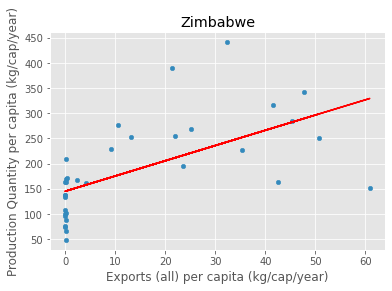

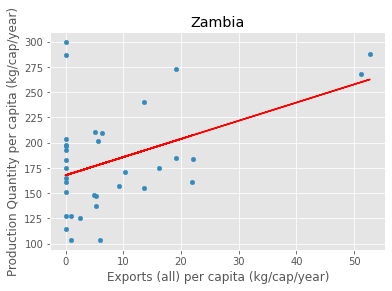

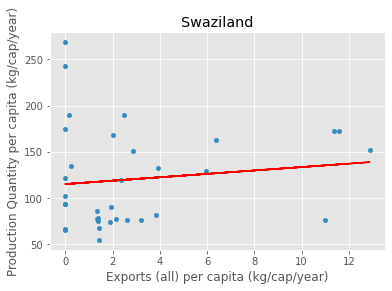

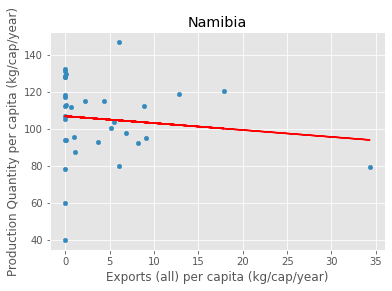

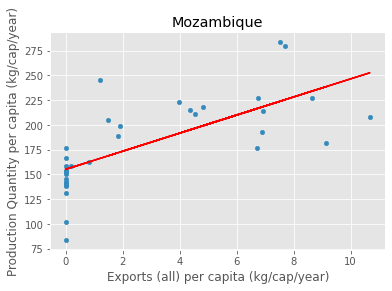

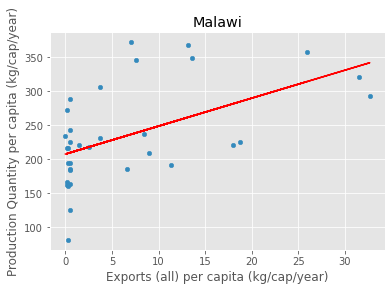

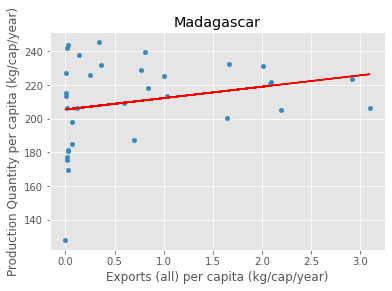

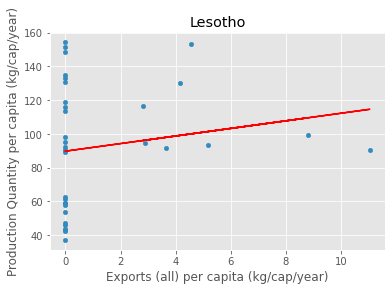

In [26]:
#calling the function for every country in Southern Africa - food production and import quantity
plot_country('Zimbabwe','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')

In [27]:
#corelation coefficient - production and export (all) 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.604624
Exports (all) per capita (kg/cap/year)                                            0.604624                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.445023
Exports (all) per capita (kg/cap/year)                                            0.445023                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)             

In [28]:
#export of grains


In [34]:
#scatter plots 
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr


Zimbabwe
2.3030738901387484
1679.2141908750352
0.2651363750801695
Zambia
3.5278881469731194
1357.817198205263
0.6891416424673376
Swaziland
2.8055869796388353
103.79337667549666
0.07132514019695188
Namibia
0.8939865139144137
168.71059222137094
0.05072109419562165
Mozambique
15.674544175810471
2321.5899122816677
0.5994596937499662
Malawi
7.351157635610115
2085.242709163952
0.3023441840269836
Madagascar
-5.614978350581116
3018.251493151377
0.004812961948055425
Lesotho
-0.43740922746613337
163.77223740029726
0.0009154229319523918


,Export Quantity (Grains & Ce.)(1000MT),Production Quantity (Grains & Ce.+ Root Crops)(1000MT)
Export Quantity (Grains & Ce.)(1000MT),1.000000,-0.030256
Production Quantity (Grains & Ce.+ Root Crops)(1000MT),-0.030256,1.000000


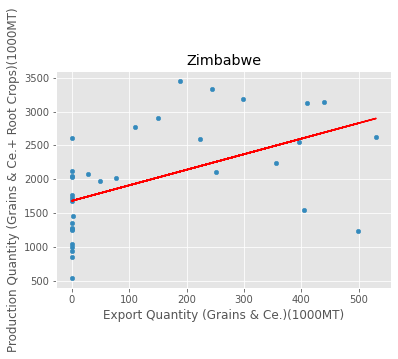

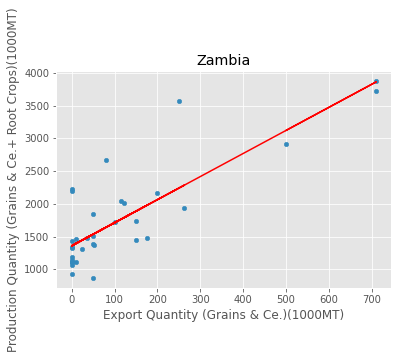

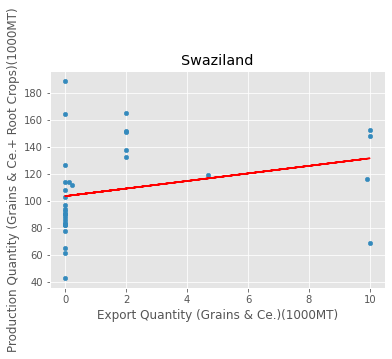

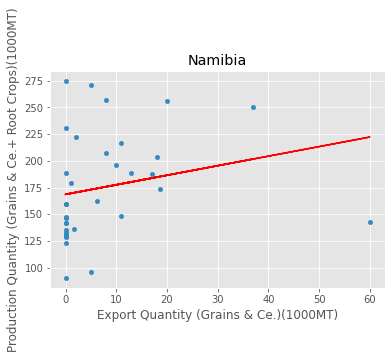

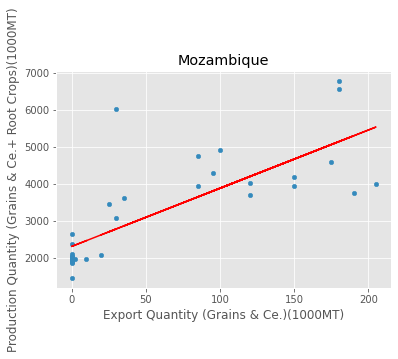

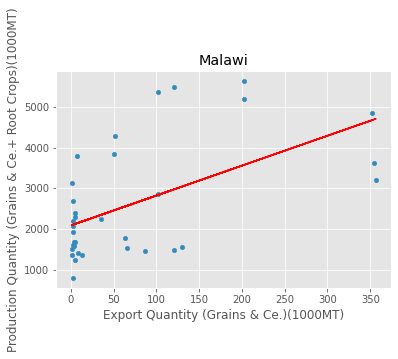

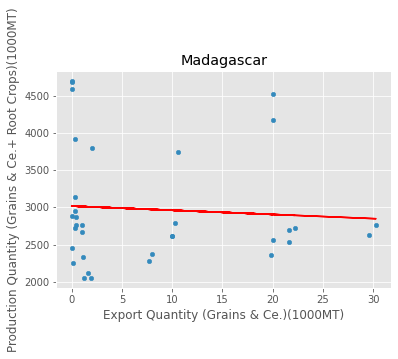

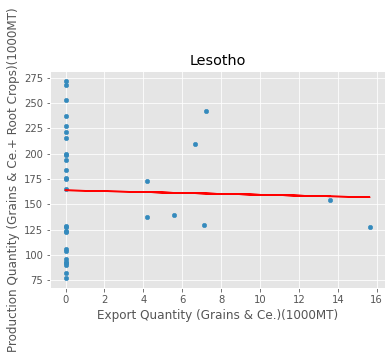

In [30]:
#calling the function for every country in Southern Africa - food production and grain export
plot_country('Zimbabwe','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Zambia','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Swaziland','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Namibia','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Mozambique','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Malawi','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Madagascar','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Lesotho','Export Quantity (Grains & Ce.)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')

In [31]:
#correlation coefficient - production and export (grains)
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.604624
Exports (all) per capita (kg/cap/year)                                            0.604624                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.445023
Exports (all) per capita (kg/cap/year)                                            0.445023                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)             

Production and Export of Root Crops

In [35]:
#scatter plots
general_df.fillna(0, inplace=True)
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr


Zimbabwe
-265.8668659092818
2109.628308279953
0.04897948960502508
Zambia
23.992059959271298
1754.2496933278665
0.00019010326534740378
Swaziland
-5.746588204150423
114.48684265414275
0.048682997304345964
Namibia
24.524611365299528
169.8302328182989
0.07035476698514766
Mozambique
1717026.1147690013
2447.017194403455
0.6427019693186897
Malawi
-631.7645503662814
2806.9723537817813
0.07443765586909173
Madagascar
-66.9803120983418
3058.8186466227585
0.04921830069600015


/usr/local/lib/python3.6/dist-packages/numpy/lib/polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


ValueError: ignored

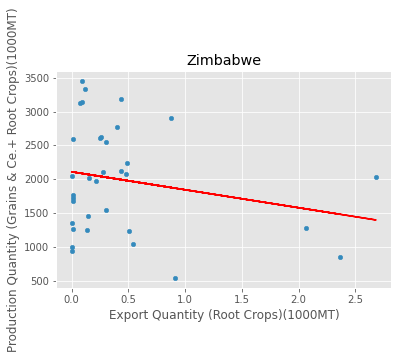

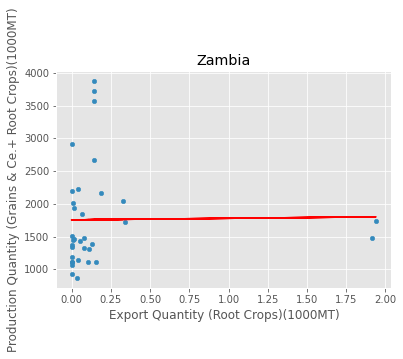

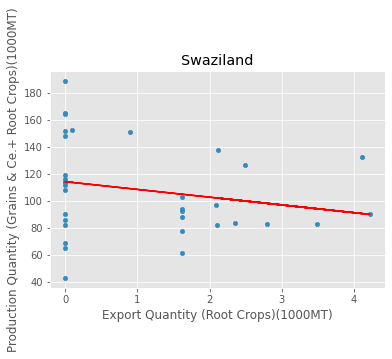

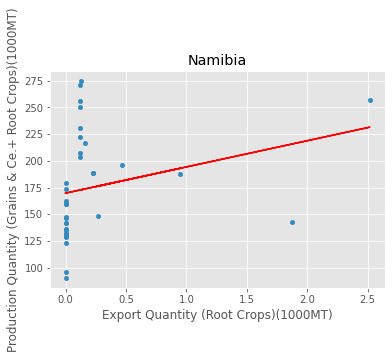

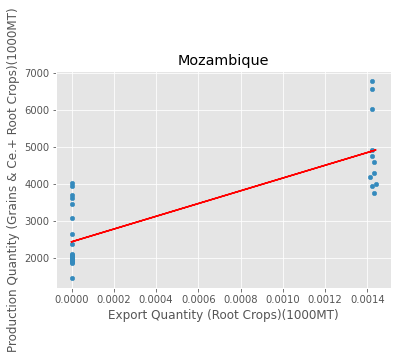

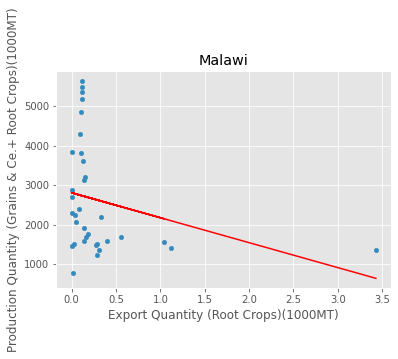

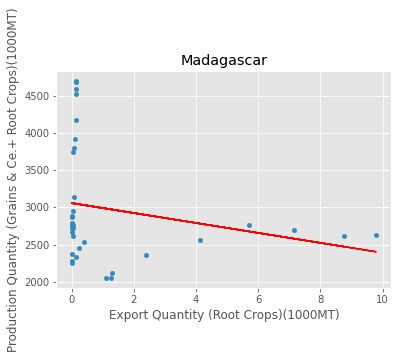

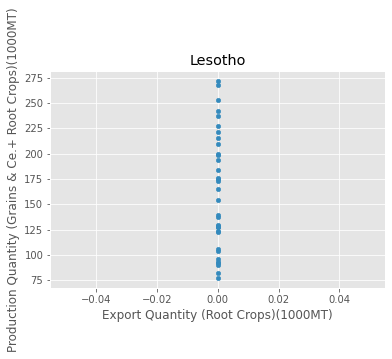

In [36]:
#calling the function for every country in Southern Africa - food production and grain export
plot_country('Zimbabwe','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Zambia','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Swaziland','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Namibia','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Mozambique','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Malawi','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Madagascar','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')
plot_country('Lesotho','Export Quantity (Root Crops)(1000MT)','Production Quantity (Grains & Ce.+ Root Crops)(1000MT)')